In [1]:
import numpy as np
import matplotlib.pyplot as plt
import joblib as jlb
import cv2
from sklearn.model_selection import train_test_split

In [2]:
ims = jlb.load("ims.np")
mas = jlb.load("mas.np")

print("Original dataset shapes:")
print("Images:", ims.shape)
print("Masks:", mas.shape)

Original dataset shapes:
Images: (1260, 1024, 1024, 4)
Masks: (1260, 1024, 1024)


In [3]:
#Cleaning the Dataset
clean_ims = []
clean_mas = []

for img, mask in zip(ims, mas):
    #Check if image and mask are not empty
    if img is not None and mask is not None and img.size > 0 and mask.size > 0:
        clean_ims.append(img)
        clean_mas.append(mask)

#Converting lists to NumPy arrays
clean_ims = np.array(clean_ims)
clean_mas = np.array(clean_mas)

print("After cleaning:")
print("Images shape:", clean_ims.shape)
print("Masks shape:", clean_mas.shape)

After cleaning:
Images shape: (1260, 1024, 1024, 4)
Masks shape: (1260, 1024, 1024)


In [4]:
#Resize Images and Masks

new_height = 256
new_width = 256

resized_ims = []
resized_mas = []

for img, mask in zip(clean_ims, clean_mas):
    # Resize image (use first 3 channels if 4th is alpha)
    img_resized = cv2.resize(img[..., :3], (new_width, new_height), interpolation=cv2.INTER_AREA)
    
    # Resize mask
    mask_resized = cv2.resize(mask, (new_width, new_height), interpolation=cv2.INTER_NEAREST)
    
    resized_ims.append(img_resized)
    resized_mas.append(mask_resized)

# Convert to NumPy arrays
resized_ims = np.array(resized_ims)
resized_mas = np.array(resized_mas)

print("After resizing:")
print("Images shape:", resized_ims.shape)
print("Masks shape:", resized_mas.shape)

After resizing:
Images shape: (1260, 256, 256, 3)
Masks shape: (1260, 256, 256)


In [5]:
resized_ims = resized_ims.astype('float32') / 255.0

In [6]:
resized_mas = resized_mas.astype('int64')

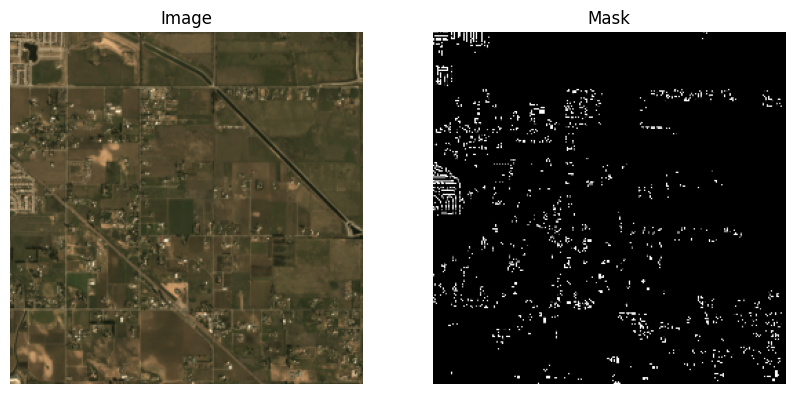

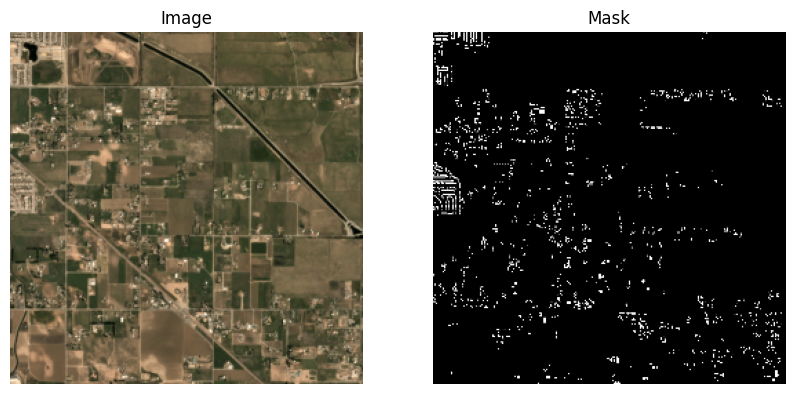

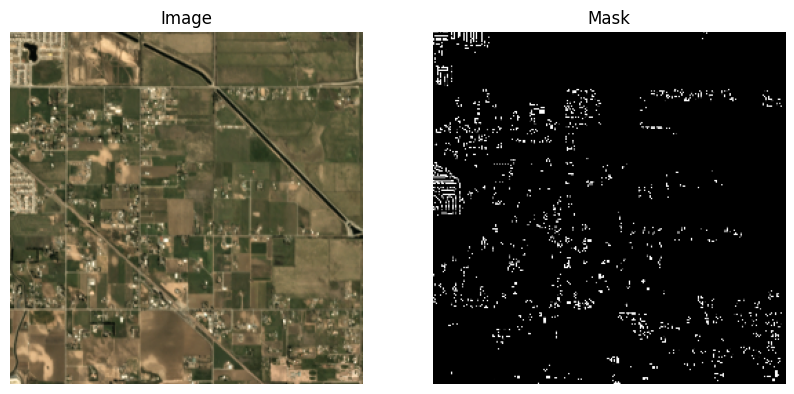

In [8]:

num_samples = 3

for i in range(num_samples):
    plt.figure(figsize=(10,5))
    
    # Image
    plt.subplot(1,2,1)
    plt.imshow(resized_ims[i])
    plt.title("Image")
    plt.axis('off')
    
    # Mask
    plt.subplot(1,2,2)
    plt.imshow(resized_mas[i], cmap='gray')
    plt.title("Mask")
    plt.axis('off')
    
    plt.show()

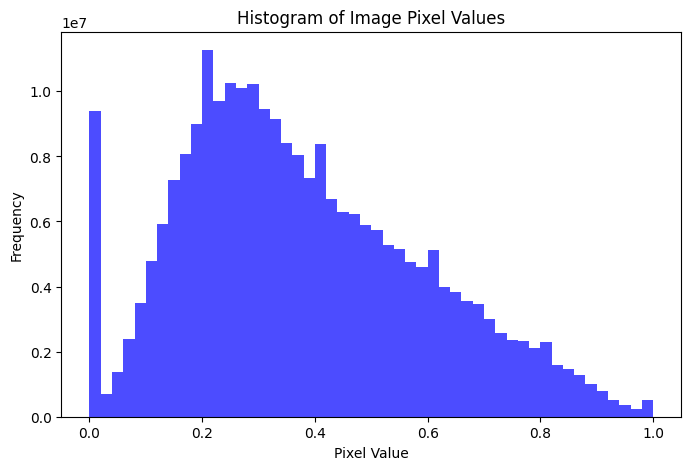

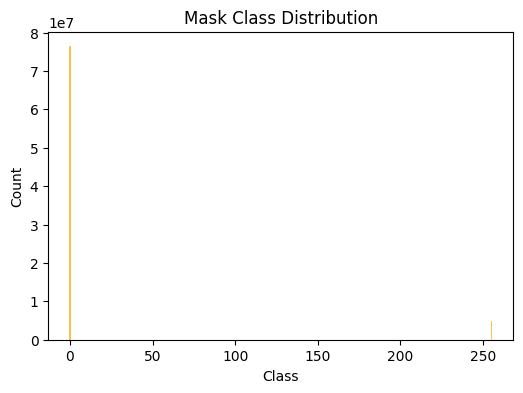

In [9]:
# Histogram of image pixel values
plt.figure(figsize=(8,5))
plt.hist(resized_ims.ravel(), bins=50, color='blue', alpha=0.7)
plt.title("Histogram of Image Pixel Values")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.show()

# Mask class distribution
unique, counts = np.unique(resized_mas, return_counts=True)
plt.figure(figsize=(6,4))
plt.bar(unique, counts, color='orange', alpha=0.7)
plt.title("Mask Class Distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

In [10]:
# Step 7: Split into Train/Test Sets
X_train, X_test, y_train, y_test = train_test_split(
    resized_ims, resized_mas, test_size=0.2, random_state=42
)

print("Train images:", X_train.shape)
print("Test images:", X_test.shape)

Train images: (1008, 256, 256, 3)
Test images: (252, 256, 256, 3)


In [11]:
jlb.dump(X_train, "X_train.jlb")
jlb.dump(X_test, "X_test.jlb")
jlb.dump(y_train, "y_train.jlb")
jlb.dump(y_test, "y_test.jlb")

print("Cleaned, resized, and split dataset saved successfully!")

Cleaned, resized, and split dataset saved successfully!


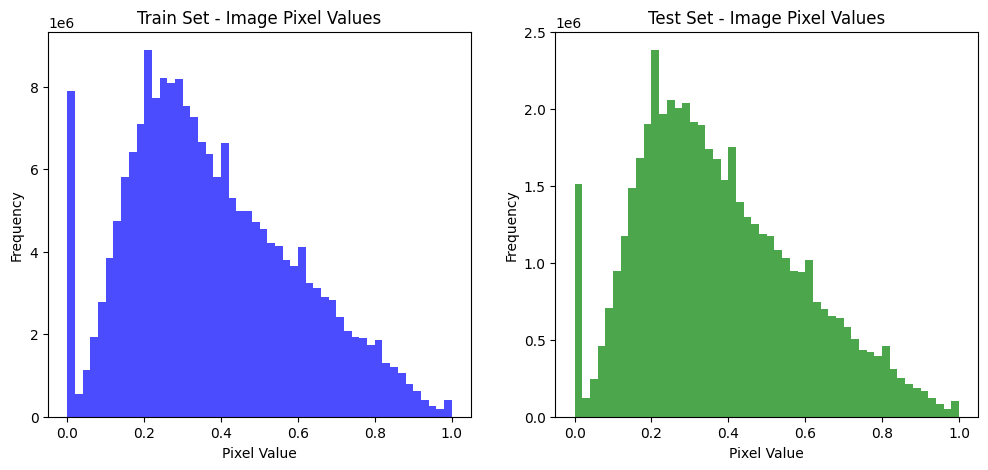

In [ ]:
import matplotlib.pyplot as plt

# Flatten all images in train set
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.hist(X_train.ravel(), bins=50, color='blue', alpha=0.7)
plt.title("Train Set - Image Pixel Values")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")

# Flatten all images in test set
plt.subplot(1,2,2)
plt.hist(X_test.ravel(), bins=50, color='green', alpha=0.7)
plt.title("Test Set - Image Pixel Values")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")

plt.show()